In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Linear Discriminant Analysis (LDA)

In [2]:
%pylab inline
import numpy.matlib
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [3]:
mycolors = ListedColormap(['#830000', '#3e9f3e', '#003366'])

## The Adidas problem

### Draw random samples from multivariate Gaussian probability density functions

In [4]:
N = 500
x1a, x2a = numpy.random.multivariate_normal([0,  0], [[50, 0], [0, .5]], N).T
x1b, x2b = numpy.random.multivariate_normal([0, +7], [[50, 0], [0, .5]], N).T
x1c, x2c = numpy.random.multivariate_normal([0, -7], [[50, 0], [0, .5]], N).T
x1 = np.append(np.append(x1a, x1b), x1c)
x2 = np.append(np.append(x2a, x2b), x2c)    

In [5]:
alpha = 30.0 * pi / 180
R = np.array([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]])
data = (np.r_['0,2', x1, x2])
data = np.dot(R, data) + numpy.matlib.repmat(np.array([[20], [25]]), 1, 3*N)

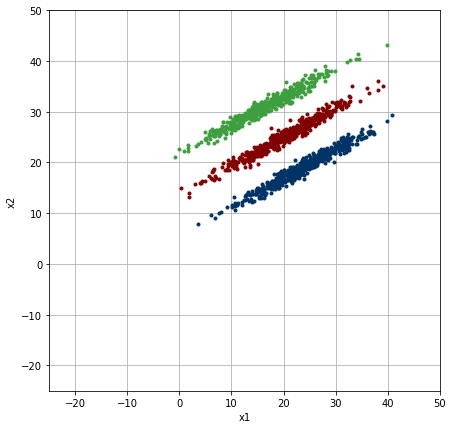

In [6]:
figure(figsize(7, 7))
plt.plot(data[0, 0:N], data[1, 0:N], '.', color=mycolors.colors[0])
plt.plot(data[0, N:2*N], data[1, N:2*N], '.', color=mycolors.colors[1])
plt.plot(data[0, 2*N:3*N], data[1, 2*N:3*N], '.', color=mycolors.colors[2])
plt.xlim([-25, 50]), plt.ylim([-25, 50])
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

### Compute LDA

#### Compute the mean vectors for each class and the overall mean vector

In [7]:
data1 = data[:,:500] # red
data2 = data[:, 500:1000] # green
data3 = data[:, 1000:] # blue
avg1 = np.mean(data1, axis = 1).reshape(2, 1)
avg2 = np.mean(data2, axis = 1).reshape(2, 1)
avg3 = np.mean(data3, axis = 1).reshape(2, 1)
avg = np.mean(data, axis = 1).reshape(2, 1)

#### Calculate the between-class scatter matrix

$$
\pmb{S}_\text{b} = \sum_{\kappa = 1}^{K = 3} p_\kappa \, (\pmb{\mu}_\kappa - \pmb{\mu}) \, (\pmb{\mu}_\kappa - \pmb{\mu})^\mathsf{T}
$$

In [8]:
S_b = len(data1[0]) * np.outer(avg1 - avg, avg1 - avg)
S_b += len(data2[0]) * np.outer(avg2 - avg, avg2 - avg)
S_b += len(data3[0]) * np.outer(avg3 - avg, avg3 - avg)
S_b /= len(data[0])
S_b

array([[  9.07442649, -14.62816075],
       [-14.62816075,  23.61447114]])

#### Calculate the within-class scatter matrix

$$
\begin{eqnarray*}
  \pmb{S}_\text{w} 
  & = & \sum_{\kappa = 1}^{K=3} p_\kappa \, \pmb{\Sigma}_\kappa \\
  & = & \sum_{\kappa = 1}^{K=3} 
  p_\kappa \, \frac{1}{m_\kappa} \sum_{i = 1}^{m_\kappa} 
  (\pmb{x}_i^\kappa - \pmb{\mu}_\kappa) \,
  (\pmb{x}_i^\kappa - \pmb{\mu}_\kappa)^\mathsf{T}
\end{eqnarray*}
$$

In [9]:
data_zeromean = data - numpy.matlib.repmat(avg, 1, len(data[0]))
data1_zeromean = data1 - numpy.matlib.repmat(avg1, 1, len(data1[0]))
data2_zeromean = data2 - numpy.matlib.repmat(avg2, 1, len(data2[0]))
data3_zeromean = data3 - numpy.matlib.repmat(avg3, 1, len(data3[0]))
S_w = np.dot(data1_zeromean, data1_zeromean.T)
S_w += np.dot(data2_zeromean, data2_zeromean.T)
S_w += np.dot(data3_zeromean, data3_zeromean.T)
S_w /= len(data[0])
S_w

array([[ 39.3782557 ,  22.09075702],
       [ 22.09075702,  13.02358613]])

#### Solve the eigenvalue/-vector problem

$$
\pmb{S}_\text{w}^{-1} \pmb{S}_\text{b} \pmb{\Phi} = \pmb{\Phi} \pmb{\Lambda}
$$

In [10]:
mat = np.dot(np.linalg.pinv(S_w), S_b)
mat

array([[ 17.76359634, -28.66513556],
       [-31.25402229,  50.43534162]])

In [11]:
eigvals, eigvecs = np.linalg.eig(mat)
eigvals, eigvecs

(array([  1.79828414e-04,   6.81987581e+01]),
 array([[-0.85002176,  0.49412399],
        [-0.52674757, -0.86939144]]))

#### Sanity check

In [12]:
np.allclose(np.dot(mat, eigvecs), np.dot(eigvecs, np.diag(eigvals)))

True

#### Sort the eigenvectors in decreasing order of their eigenvalues

In [13]:
eiglist = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
eiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)
eiglist

[(68.198758128540419, array([ 0.49412399, -0.86939144])),
 (0.00017982841354324819, array([-0.85002176, -0.52674757]))]

#### Transform the data

The (first) eigenvectors are the rows of $\pmb{\Phi}$:

In [14]:
Phi = np.array([eiglist[i][1] for i in range(2)])
data_pca = np.dot(Phi, data_zeromean)
Phi

array([[ 0.49412399, -0.86939144],
       [-0.85002176, -0.52674757]])

#### Visualization

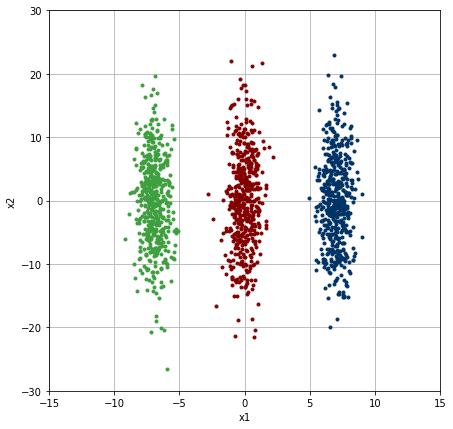

In [15]:
figure(figsize(7, 7))
plt.plot(data_pca[0, 0:N], data_pca[1, 0:N], '.', color=mycolors.colors[0])
plt.plot(data_pca[0, N:2*N], data_pca[1, N:2*N], '.', color=mycolors.colors[1])
plt.plot(data_pca[0, 2*N:3*N], data_pca[1, 2*N:3*N], '.', color=mycolors.colors[2])
plt.xlim([-15, 15]), plt.ylim([-30, 30])
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

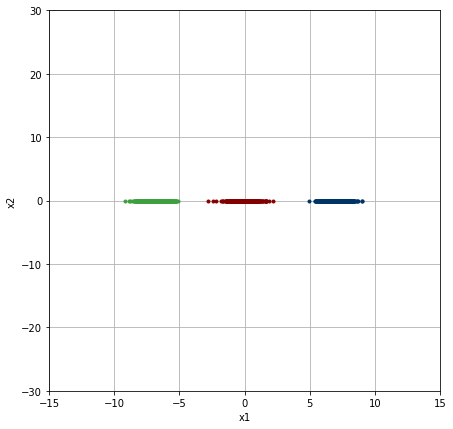

In [16]:
figure(figsize(7, 7))
zeros = np.zeros(N)
plt.plot(data_pca[0, 0:N], zeros, '.', color=mycolors.colors[0])
plt.plot(data_pca[0, N:2*N], zeros, '.', color=mycolors.colors[1])
plt.plot(data_pca[0, 2*N:3*N], zeros, '.', color=mycolors.colors[2])
plt.xlim([-15, 15]), plt.ylim([-30, 30])
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()